## A Basic Linear Regression Project
*By [Manish Goyal](https://github.com/manisgoyal)*

Importing all libraries needed for the project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

Importing the Data set.<br>
<a href="https://people.sc.fsu.edu/~jburkardt/datasets/regression/x20.txt"><i>Source</i></a>

In [2]:
dataset = pd.read_csv("data.csv")

Inspecting the data set

In [13]:
dataset.head()

(46, 5)

In [14]:
dataset.shape

(46, 5)

A general mathematical insight of the dataset

In [4]:
dataset.describe()

,Urban population (percentage),Late births (reciprocal * 100),Wine consumption per capita,Cirrhosis death rate,Liquor consumption per capita
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,56.260870,41.476087,11.586957,57.500000,63.493478
std,15.747218,7.044342,6.920424,22.140712,23.447979
min,27.000000,31.200000,2.000000,26.000000,28.000000
25%,44.250000,35.625000,6.250000,41.500000,48.900000
50%,55.000000,42.250000,10.000000,56.000000,57.650000
75%,65.000000,45.825000,15.750000,68.750000,75.700000
max,87.000000,56.100000,31.000000,149.000000,129.900000


Looking at the distribution of the **Cirrhosis death rate** in regards to other distribution factors 

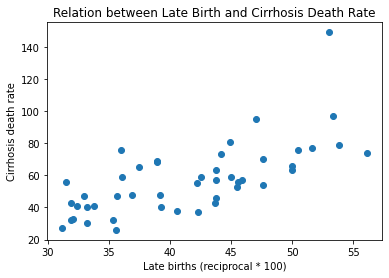

In [21]:
plt.scatter(x=dataset['Late births (reciprocal * 100)'], y=dataset['Cirrhosis death rate'])
plt.xlabel('Late births (reciprocal * 100)')
plt.ylabel('Cirrhosis death rate')
plt.title('Relation between Late Birth and Cirrhosis Death Rate')
plt.show()

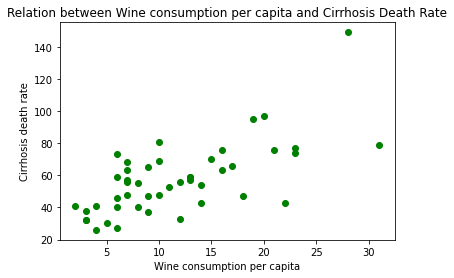

In [22]:
plt.scatter(x=dataset['Wine consumption per capita'], y=dataset['Cirrhosis death rate'],color='g')
plt.xlabel('Wine consumption per capita')
plt.ylabel('Cirrhosis death rate')
plt.title('Relation between Wine consumption per capita and Cirrhosis Death Rate')
plt.show()

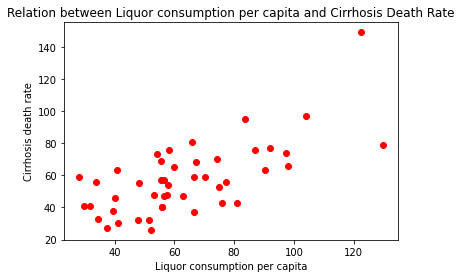

In [23]:
plt.scatter(x=dataset['Liquor consumption per capita'], y=dataset['Cirrhosis death rate'],color='r')
plt.xlabel('Liquor consumption per capita')
plt.ylabel('Cirrhosis death rate')
plt.title('Relation between Liquor consumption per capita and Cirrhosis Death Rate')
plt.show()

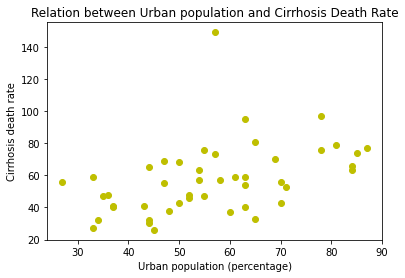

In [24]:
plt.scatter(x=dataset['Urban population (percentage)'], y=dataset['Cirrhosis death rate'],color='y')
plt.xlabel('Urban population (percentage)')
plt.ylabel('Cirrhosis death rate')
plt.title('Relation between Urban population and Cirrhosis Death Rate')
plt.show()

The distribution shows a linear trend of distribution. Now, we split the dataset in two different dataframes x and y for independent and dependent variables respectively.  

In [25]:
x= dataset[['Urban population (percentage)','Late births (reciprocal * 100)','Wine consumption per capita','Liquor consumption per capita']]
y= dataset['Cirrhosis death rate']

Then there is test train split for supervised training.
The script splits 70% of the data to training set while 230% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

### Visualisation of test train split

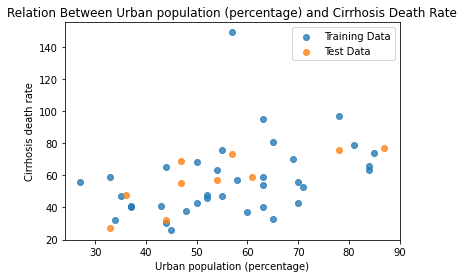

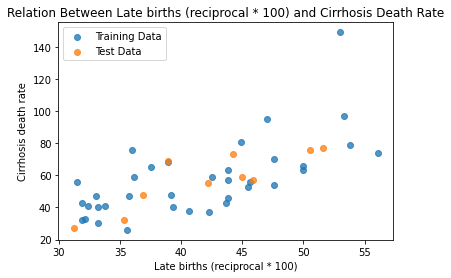

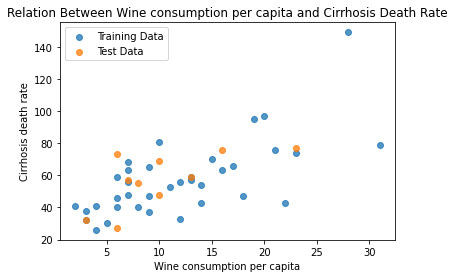

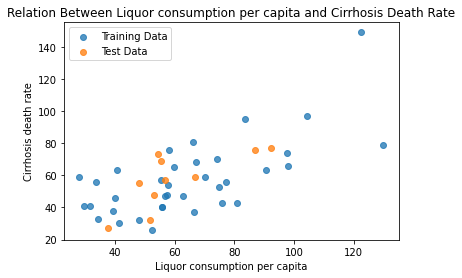

In [60]:
for column in x_train.columns:
    plt.scatter(x_train[column],y_train, label='Training Data', alpha=0.77)
    plt.scatter(x_test[column], y_test, label='Test Data', alpha=0.77)
    plt.legend()
    plt.title(f"Relation Between {column} and Cirrhosis Death Rate")
    plt.xlabel(column)
    plt.ylabel('Cirrhosis death rate')
    plt.show()
    

There is not much disparity among the data. So, we will create a linear model and train it.
### Linear Model Creation

In [55]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Listing coefficients made by the linear model

In [56]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Urban population (percentage),-1.221653
Late births (reciprocal * 100),2.978466
Wine consumption per capita,1.842067
Liquor consumption per capita,0.062714


### Making Predictions
We will make predictions for the test data and match it with the actual data.

In [58]:
y_pred = regressor.predict(x_test)

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
43,32,38.014237
33,59,65.504907
25,76,67.911393
18,27,43.888915
9,57,65.051282
13,69,58.204538
6,73,54.336623
36,77,73.413413
34,55,63.885256
12,48,65.541546


### Evaluating the performance of the algorithm
The final step is to evaluate the performance of algorithm. We'll do this by finding the values for:
- MAE(Mean Absolute Error)
- MSE(Mean Squared Error)
- RMSE(Root Mean Squared Error) 

In [68]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.502017717822532
Mean Squared Error: 135.83498951496261
Root Mean Squared Error: 11.654826876232981


Since, the value of root mean squared error is 11.65, which is greater than 10% of the mean value of the Cirrhosis Death Rate. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [69]:
regressor.score(x_test.values,y_test.values)

0.5103457354999364

The coefficient of determination  of the prediction R<sup>2</sup> is 0.51.

### Predicting the Cirrhosis Death Rate value provided all other values

In [72]:
# Assuming all provided value are integers
x_new = [62.3,46.2,15.84,57.6]
""" 
    'Urban population (percentage)' - 62.3,
    'Late births (reciprocal * 100)' - 46.2,
    'Wine consumption per capita' - 15.84,
    'Liquor consumption per capita' - 57.6
"""
regressor.predict([x_new])[0]

72.1516905204162

So, the value of the cirrhosis death rate can be predicted by using the algorithm.

Submitted for: **IEEE-VIT Technical Round 2**